
Call:
lm(formula = value ~ Place + Time, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-70.396 -21.205  -1.016  20.618  45.894 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)     61.66      11.78   5.236 6.33e-06 ***
PlaceNest      -72.59      10.90  -6.658 7.16e-08 ***
PlaceSauder     31.23      10.90   2.865 0.006762 ** 
Time2pm-5pm     18.90      14.08   1.343 0.187302    
Time5pm-8pm     56.44      14.08   4.010 0.000274 ***
Time8-11am      14.34      14.08   1.019 0.314581    
Time8pm-12am    52.83      14.08   3.754 0.000582 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 29.86 on 38 degrees of freedom
Multiple R-squared:  0.7602,	Adjusted R-squared:  0.7224 
F-statistic: 20.08 on 6 and 38 DF,  p-value: 2.057e-10


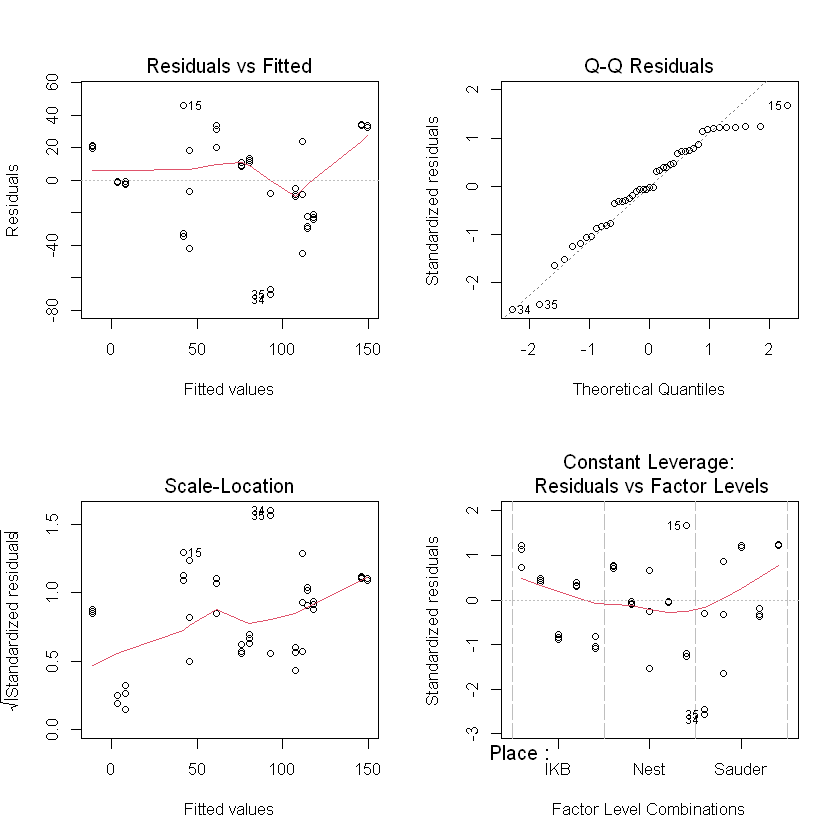

In [10]:
df <- read.csv("./data.csv", header = TRUE, sep = ",")
df <- df[df$Place != "Marine Drive",]

library(dplyr)
library(tidyr)
library(MASS)

df <- df %>%
  pivot_longer(starts_with("Rep"), 
               names_to = "Speed", 
               values_to = "value") %>%
  as.data.frame()

df$Time  <- factor(df$Time)
df$Place <- factor(df$Place)
df$ID <- seq_len(nrow(df))

# Fit once
fit <- lm(value ~ Place + Time, data=df)

# Summary
summary(fit)

# Assumption Plots
par(mfrow=c(2,2))
plot(fit)

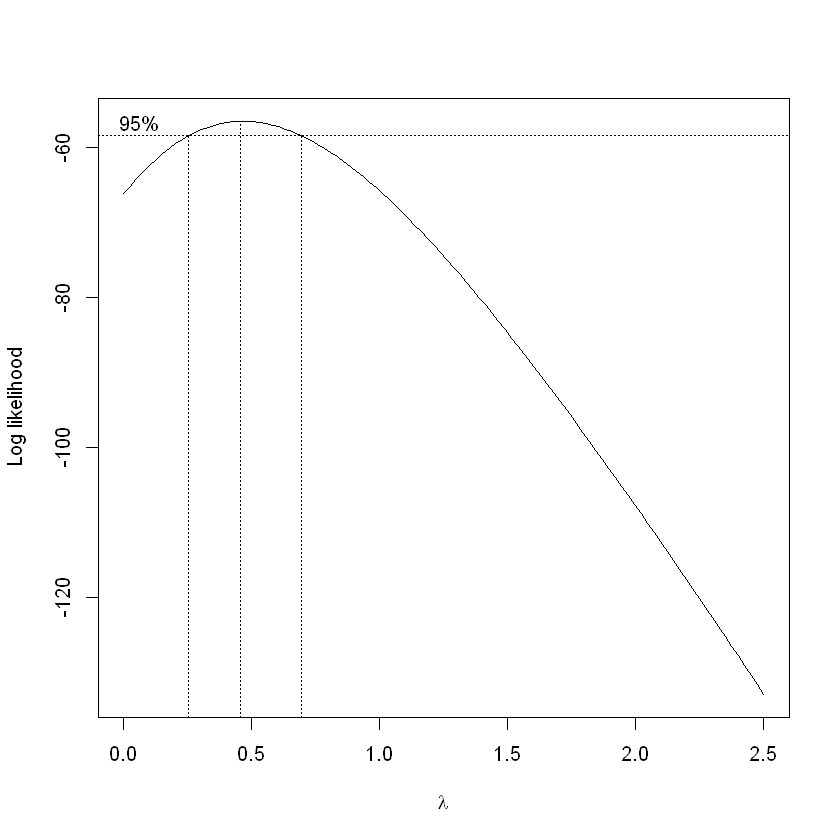

In [11]:
boxcox(value ~ Place + Time, data = df,
   lambda = seq(0, 2.5, len = 21), ylab = "Log likelihood")

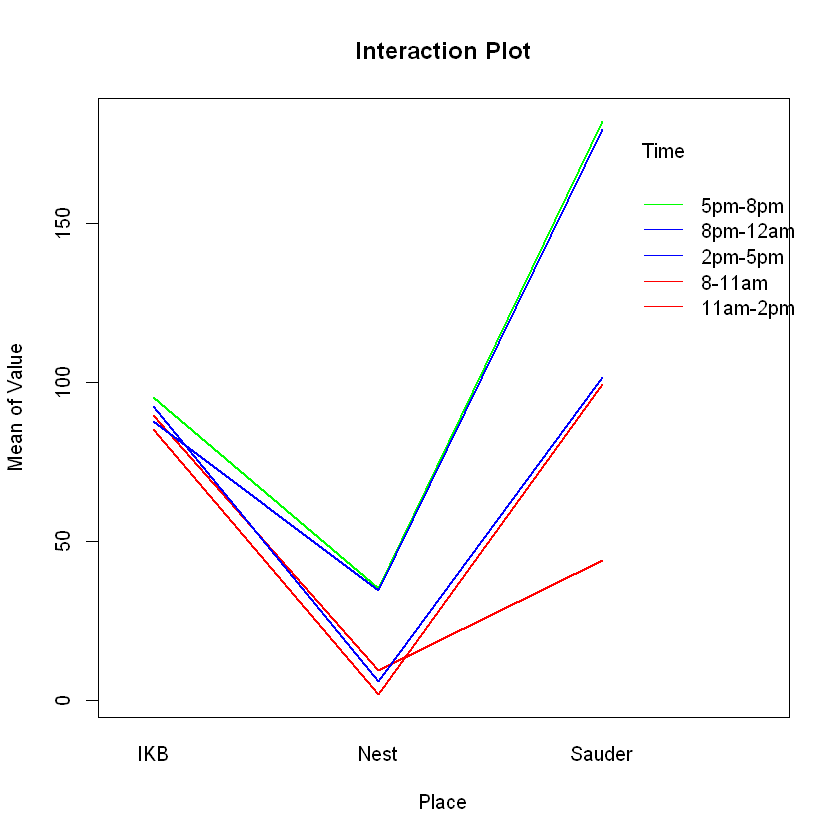

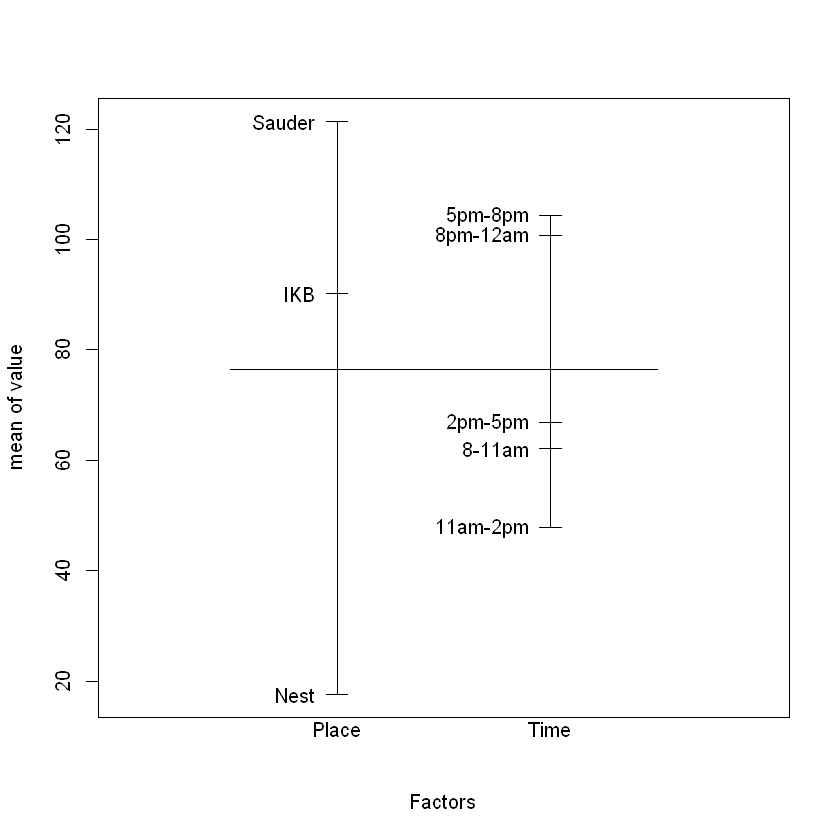

In [13]:
# Effect plots

interaction.plot(df$Place, df$Time, df$value,
                 main="Interaction Plot",
                 xlab="Place",
                 ylab="Mean of Value",
                 trace.label="Time",
                 col=c("red","blue","green"),
                 lty=1,
                 lwd=2)

plot.design(value ~ Place + Time, data=df)

In [14]:
fit <- lm(sqrt(value) ~ Place + Time, data=df)
summary(fit)


Call:
lm(formula = sqrt(value) ~ Place + Time, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3250 -1.3011  0.4716  1.1778  4.4973 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    7.9250     0.7335  10.805 3.81e-13 ***
PlaceNest     -6.0199     0.6791  -8.865 8.69e-11 ***
PlaceSauder    1.1435     0.6791   1.684 0.100394    
Time2pm-5pm    1.0604     0.8767   1.210 0.233913    
Time5pm-8pm    3.2445     0.8767   3.701 0.000678 ***
Time8-11am     0.5644     0.8767   0.644 0.523603    
Time8pm-12am   2.9678     0.8767   3.385 0.001663 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.86 on 38 degrees of freedom
Multiple R-squared:  0.7985,	Adjusted R-squared:  0.7667 
F-statistic:  25.1 on 6 and 38 DF,  p-value: 8.309e-12


In [15]:
contrasts(df$Place)

,Nest,Sauder
IKB,0,0
Nest,1,0
Sauder,0,1


In [16]:
# Contrasts (main, interaction)
SaudervsNest <- c(0, -1, 1)
IKBvsSauder <- c(-1, 0, 1)

EarlyvsLate <- c(0, -1/4, 1/4 , -1/4, 1/4)
MorningvsLunch <- c(-1/2, 0, 0, 1/2, 0)

contrasts(df$Place) <- cbind(SaudervsNest, IKBvsSauder)
contrasts(df$Time) <- cbind(EarlyvsLate, MorningvsLunch)


In [17]:
place.aov <- aov(sqrt(value) ~ Place, data = df)
summary(place.aov, split = list(Place = list(SaudervsNest = 1, IKBvsSauder = 2)))

time.aov <- aov(sqrt(value) ~ Time, data = df)
summary(time.aov, split = list(Time = list(EarlyvsLate = 1, MorningvsLunch = 2)))

aov_model <- aov(sqrt(value) ~ Place + Time, data = df)
summary(aov_model, split = list(
    Place = list(SaudervsNest = 1, IKBvsSauder = 2),
    Time  = list(EarlyvsLate = 1, MorningvsLunch = 2)
))

                      Df Sum Sq Mean Sq F value   Pr(>F)    
Place                  2  444.3   222.2   44.89 3.73e-11 ***
  Place: SaudervsNest  1  384.9   384.9   77.76 4.17e-11 ***
  Place: IKBvsSauder   1   59.4    59.4   12.01  0.00123 ** 
Residuals             42  207.9     4.9                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

                       Df Sum Sq Mean Sq F value Pr(>F)  
Time                    4   76.4   19.11   1.328 0.2763  
  Time: EarlyvsLate     1   47.4   47.35   3.290 0.0772 .
  Time: MorningvsLunch  1   15.1   15.06   1.046 0.3125  
Residuals              40  575.7   14.39                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

                       Df Sum Sq Mean Sq F value   Pr(>F)    
Place                   2  444.3   222.2  64.234 6.46e-13 ***
  Place: SaudervsNest   1  384.9   384.9 111.280 7.57e-13 ***
  Place: IKBvsSauder    1   59.4    59.4  17.189 0.000183 ***
Time                    4   76.4    19.1   5.526 0.001316 ** 
  Time: EarlyvsLate     1   47.4    47.4  13.692 0.000680 ***
  Time: MorningvsLunch  1   15.1    15.1   4.355 0.043672 *  
Residuals              38  131.4     3.5                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1